In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [45]:
df = pd.read_csv("swiggy.csv")

In [46]:
# A list of colors for the plots
custom_palette = sns.color_palette("viridis", 10)

In [47]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [48]:
df.columns = ['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg_ratings', 'Total_ratings', 'Food_type', 'Address', 'Delivery_time']

In [49]:
#renaming some columns for convinience

In [50]:
#information about dataet
df.info()
print("\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg_ratings    8680 non-null   float64
 6   Total_ratings  8680 non-null   int64  
 7   Food_type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery_time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB




In [51]:

#In the dataset, 'Price' and 'Avg_ratings' columns are already numeric but 'Total_ratings' needs cleaning
# Therefore lets remove the '+' sign from 'Total_ratings' and convert it to a numeric type.


df['Total_ratings'] = df['Total_ratings'].astype(str).str.replace('+', '', regex=False)
df['Total_ratings'] = pd.to_numeric(df['Total_ratings'], errors='coerce')


In [52]:
#Checking and handling missing values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [53]:
print("Cleaned DataFrame Info:")
df.info()

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg_ratings    8680 non-null   float64
 6   Total_ratings  8680 non-null   int64  
 7   Food_type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery_time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [54]:
print("Cleaned DataFrame Head:")
df.head()


Cleaned DataFrame Head:


,ID,Area,City,Restaurant,Price,Avg_ratings,Total_ratings,Food_type,Address,Delivery_time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [55]:

# The 'Food_type' column contains multiple cuisines in a string.
# We'll prepare this for analysis by splitting and counting individual cuisines.
all_food_types = df['Food_type'].str.replace(' ', '').str.split(',').explode()
top_food_types = all_food_types.value_counts().head(10)


C:\Users\Suyash chandra\AppData\Local\Temp\ipykernel_24680\2107925653.py:5: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(x=city_counts.index, y=city_counts.values, palette=custom_palette)


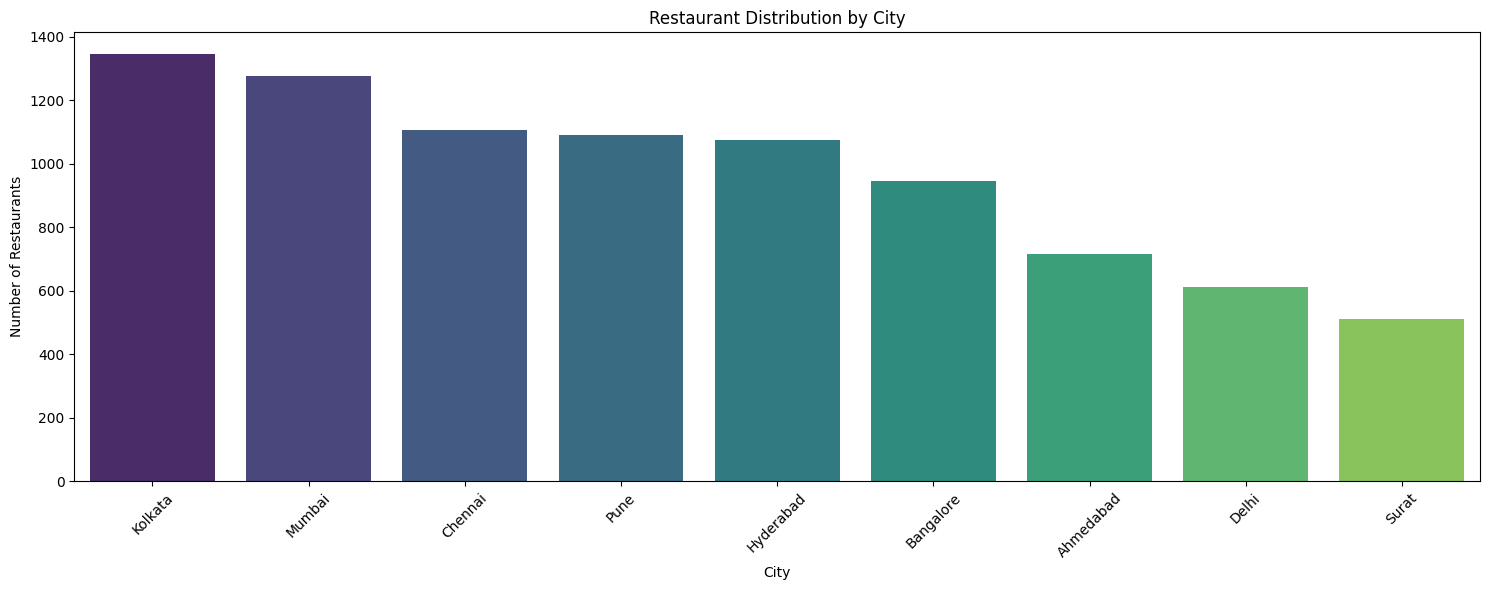

In [59]:
#  Restaurant Distribution by City
# This bar plot visualizes the number of restaurants in each city.
plt.figure(figsize=(15, 6))
city_counts = df['City'].value_counts()
sns.barplot(x=city_counts.index, y=city_counts.values, palette=custom_palette)
plt.title('Restaurant Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

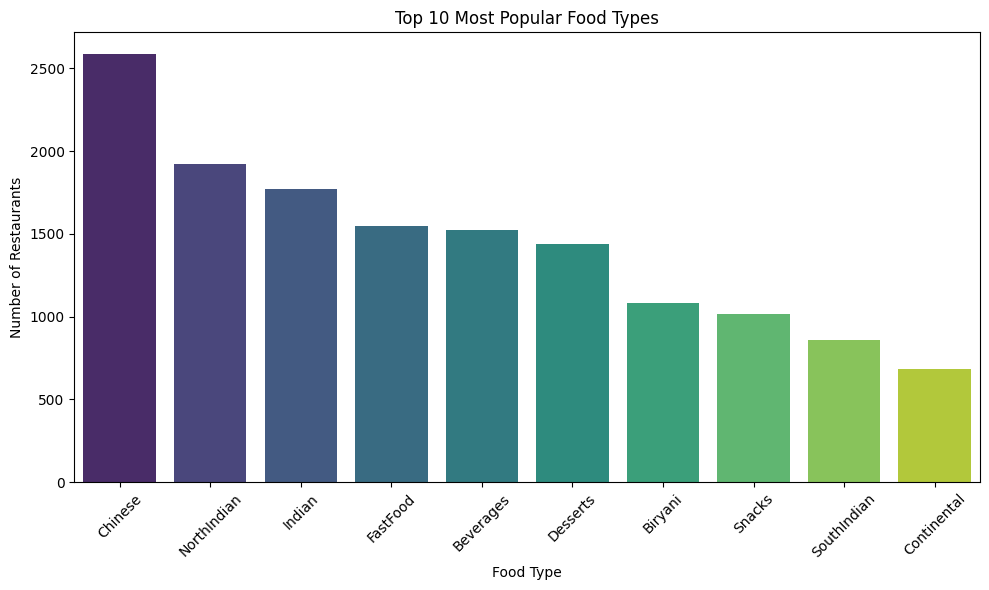

In [60]:
# Top 10 Most Popular Food Type
# This bar plot shows the most frequently offered food types.
plt.figure(figsize=(10, 6))
sns.barplot(x=top_food_types.index, y=top_food_types.values, palette=custom_palette)
plt.title('Top 10 Most Popular Food Types')
plt.xlabel('Food Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

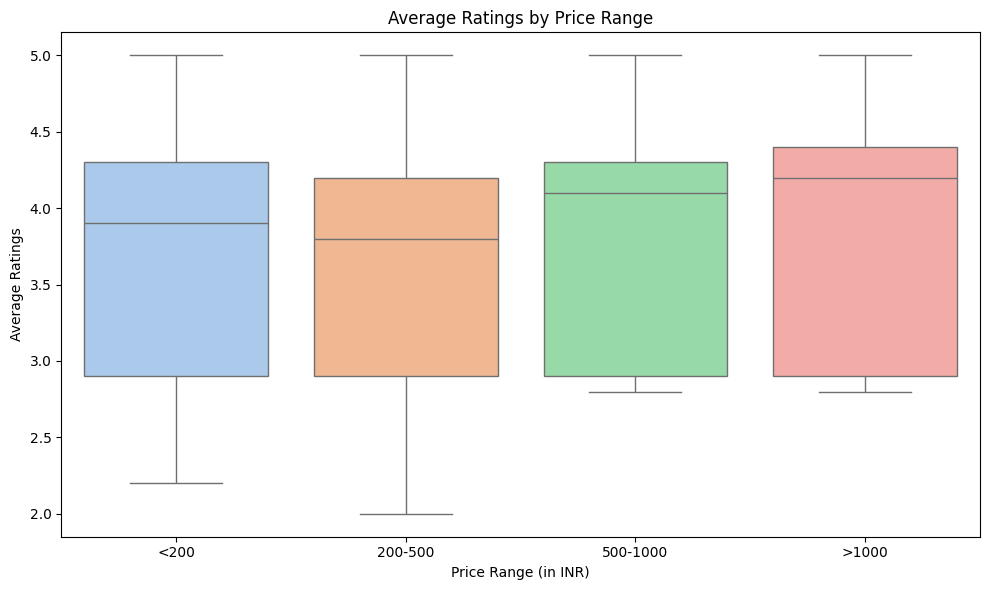

In [58]:

# Average Ratings by Price Range
# We'll categorize the restaurants into price ranges to see if there's a trend.
price_bins = [0, 200, 500, 1000, 5000]
price_labels = ['<200', '200-500', '500-1000', '>1000']
df['Price_Range'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_Range', y='Avg_ratings', data=df, palette='pastel')
plt.title('Average Ratings by Price Range')
plt.xlabel('Price Range (in INR)')
plt.ylabel('Average Ratings')
plt.tight_layout()
plt.show()

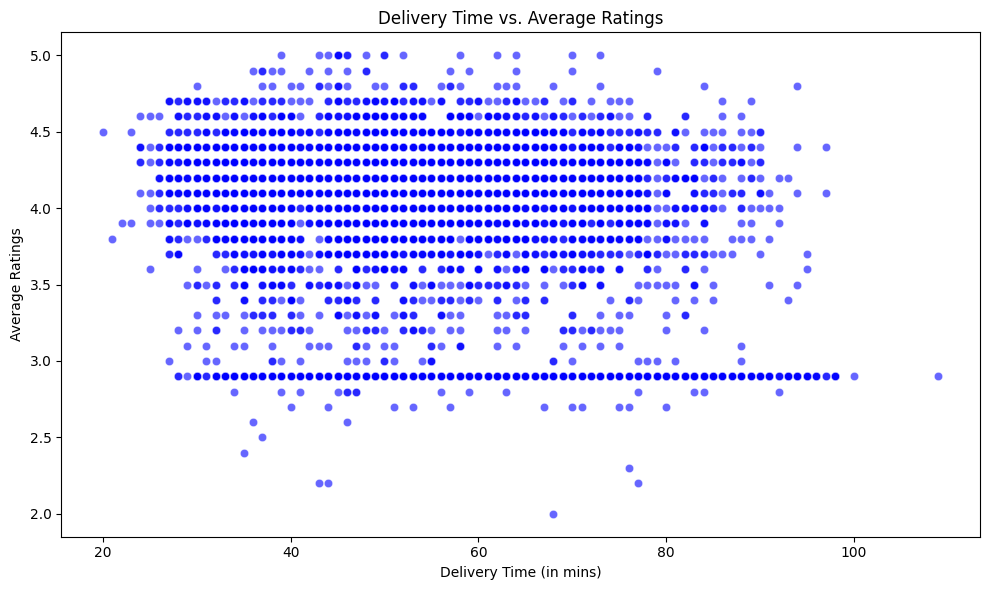

In [62]:
# Delivery Time vs. Average Rating
# A scatter plot helps visualize the relationship between delivery time and ratings.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delivery_time', y='Avg_ratings', data=df, alpha=0.6, color='b')
plt.title('Delivery Time vs. Average Ratings')
plt.xlabel('Delivery Time (in mins)')
plt.ylabel('Average Ratings')
plt.tight_layout()
plt.show()